In [8]:
# load dataset - forge: binary classification
import mglearn

X, y = mglearn.datasets.make_forge()

(26, 2)


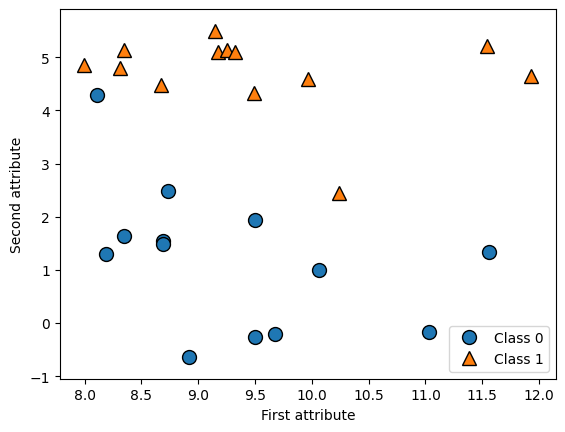

In [9]:
# scatter plot
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

import matplotlib.pyplot as plt

plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First attribute')
plt.ylabel('Second attribute')

print(X.shape)
plt.show()

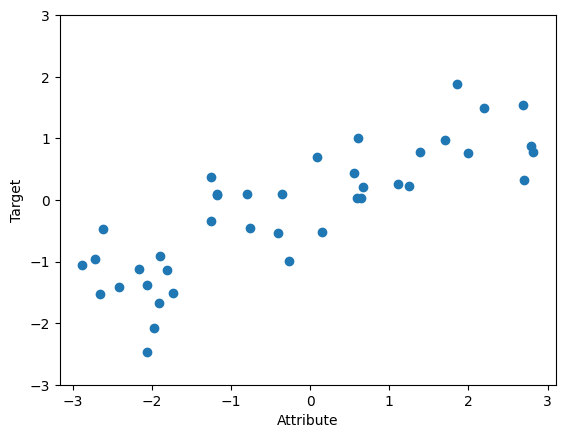

In [10]:
# load second dataset: wave - regression
X, y = mglearn.datasets.make_wave(n_samples=40)

# plot
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Attribute')
plt.ylabel('Target')
plt.show()

In [11]:
# load third dataset - wisconcin breast cancer
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(f'cancer_keys: \n {cancer.keys()}')
print(f'cancer shape: \n {cancer.data.shape}')

cancer_keys: 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
cancer shape: 
 (569, 30)


In [12]:
cancer['data'][0:10]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [13]:
# sample counts by class
import numpy as np

print('sample counts: \n', {n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
print(cancer.feature_names)

sample counts: 
 {np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [14]:
# load fourth dataset - boston housing
url = 'http://lib.stat.cmu.edu/datasets/boston'

import pandas as pd

raw_df = pd.read_csv(url, sep='\s+', skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[::2, 2]
print('data shape:\n', data.shape)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\USER\AppData\Local\Temp\ipykernel_26852\1916429089.py:6: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(url, sep='\s+', skiprows=22, header=None)


data shape:
 (506, 13)


# k-NN

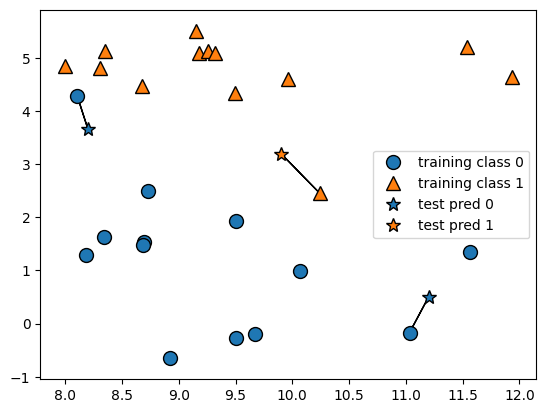

In [15]:
# knn when n_neighbors = 1
mglearn.plots.plot_knn_classification(n_neighbors=1)

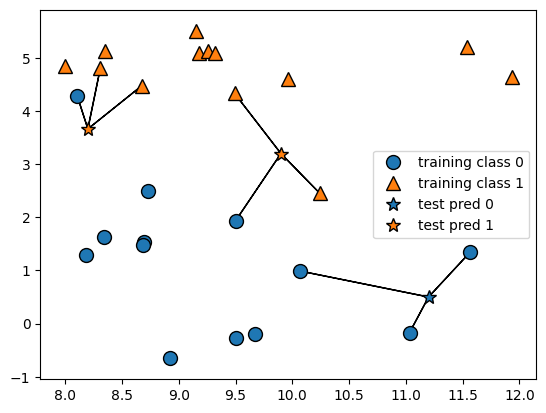

In [16]:
# knn when n_neighbors = 3
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [20]:
# knn in sklearn
# split data
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# generate knn instance
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

# fit model
clf.fit(X_train, y_train)

# prediction
y_pred = clf.predict(X_test)
print(f'prediction: {y_pred}')

# evaluate the accuracy of model
accuracy = clf.score(X_test, y_test)
print(f'accuracy: {accuracy:.2f}')

prediction: [1 0 1 0 1 0 0]
accuracy: 0.86


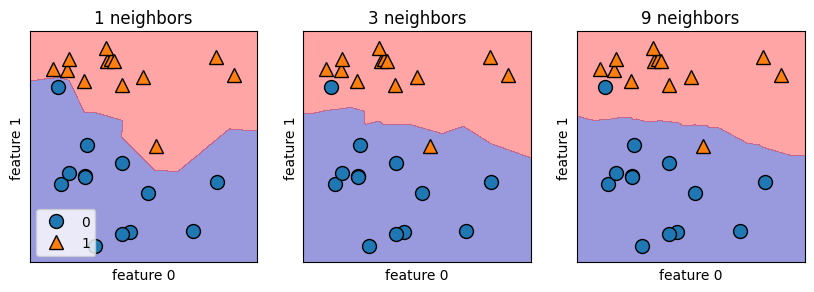

In [22]:
# view decision boundaries
# set figure
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# generate plots
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title(f'{n_neighbors} neighbors')
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

axes[0].legend(loc=3)

### relations between generalization and model complexity

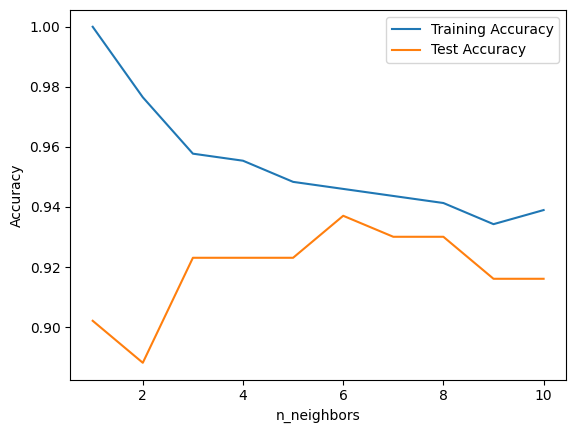

In [24]:
# split data
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state=66,
                                                   stratify=cancer.target)

training_accuracy = []
test_accuracy = []

# set n_neighbors from 1 to 10
neighbors_setting = range(1, 11)

# train model with different n_neighbors
for n_neighbors in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # save accuracy in lists
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
# visualize the accuracy
plt.plot(neighbors_setting, training_accuracy, label='Training Accuracy')
plt.plot(neighbors_setting, test_accuracy, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

# k-NN regression

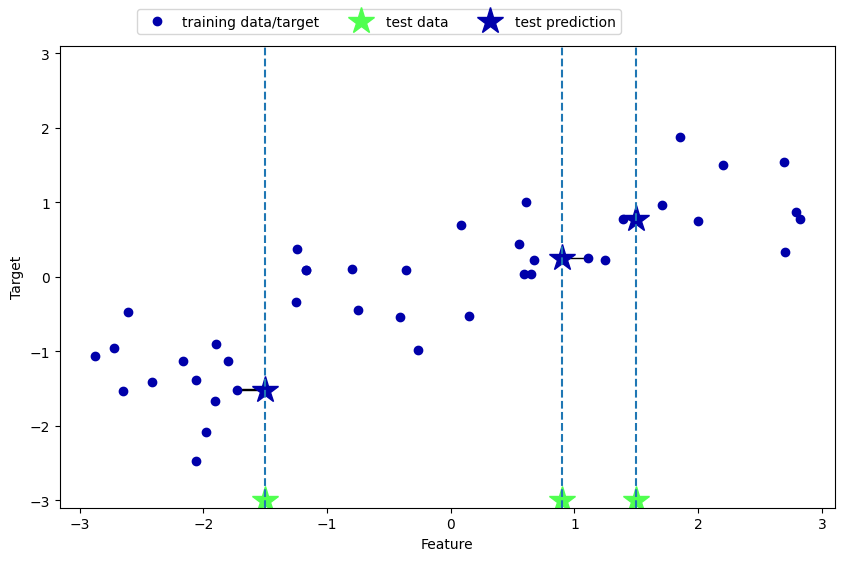

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

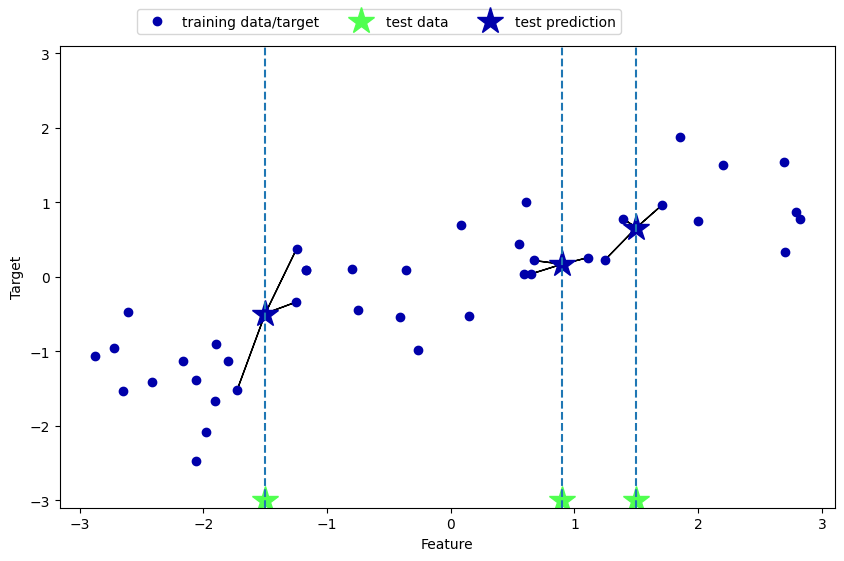

In [26]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

### knn_regression on sklearn

In [28]:
# knn_regression on sklearn
# import module
from sklearn.neighbors import KNeighborsRegressor

# import wave dataset
X, y = mglearn.datasets.make_wave(n_samples=40)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# generate knn regressor instance with n_neighbors=3
reg = KNeighborsRegressor(n_neighbors=3)

# train model
reg.fit(X_train, y_train)

# prediction
reg_pred = reg.predict(X_test)
print('prediction:', reg_pred)

# evaluate the accuracy
accuracy = reg.score(X_test, y_test)
print(f'accuracy: {accuracy:.2f}')

prediction: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
accuracy: 0.83


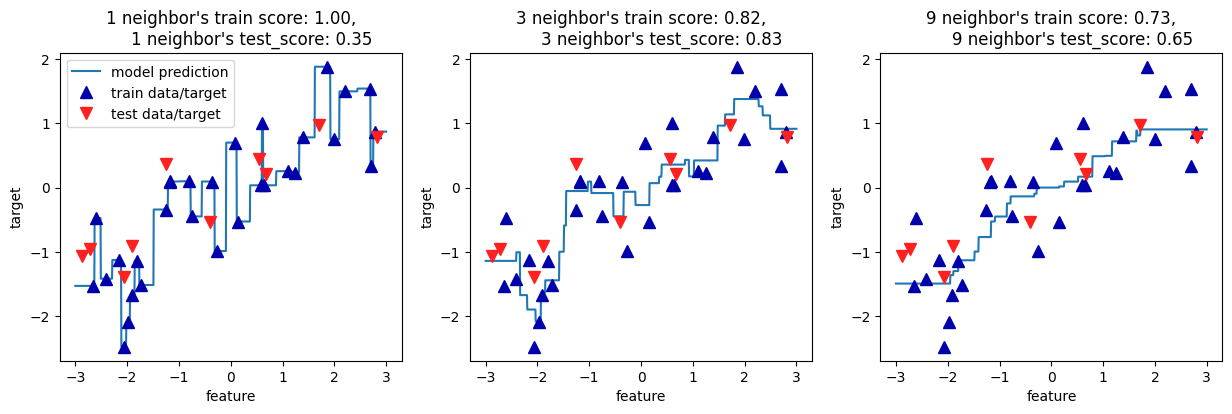

In [32]:
# set numerous features
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create points between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

# predict with knn(n_neighbors = 1, 3, 9)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        f"""{n_neighbors} neighbor's train score: {reg.score(X_train, y_train):.2f},
        {n_neighbors} neighbor's test_score: {reg.score(X_test, y_test):.2f}"""
    )
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    
axes[0].legend(['model prediction', 'train data/target',
              'test data/target'], loc='best')